In [1]:
import pickle

# Path to the pickle file
pickle_file_path = '/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/notebooks/varience_analysis/Features_binary_split_0_kinect_rgb/features_by_class.pickle'

# Load the dictionary from the pickle file
with open(pickle_file_path, 'rb') as handle:
    loaded_features_by_class = pickle.load(handle)

# Print the loaded dictionary to verify its contents
print("Loaded features by class successfully:")
print(loaded_features_by_class)

Loaded features by class successfully:
{0: array([[ 0.04110655, -0.13989964, -0.10817131, ..., -0.04773098,
        -0.12528147,  0.07864159],
       [ 0.01785623, -0.15238588, -0.13102521, ..., -0.05035559,
        -0.12428994,  0.0712035 ],
       [ 0.01438782, -0.13875481, -0.15631329, ..., -0.04806796,
        -0.09027962,  0.07788383],
       ...,
       [ 0.09432463, -0.11035094, -0.09907368, ..., -0.03312398,
        -0.11810396,  0.08119474],
       [ 0.08805221, -0.10931683, -0.10842346, ..., -0.03464087,
        -0.10752042,  0.06914657],
       [ 0.09222632, -0.112335  , -0.09447549, ..., -0.03091649,
        -0.1003587 ,  0.0605195 ]]), 1: array([[ 0.04393481, -0.103698  , -0.1032593 , ..., -0.03917844,
        -0.12058262,  0.05428848],
       [ 0.02594432, -0.1150863 , -0.1046125 , ..., -0.03394674,
        -0.12621248,  0.05163221],
       [ 0.02390348, -0.13141918, -0.08928952, ..., -0.03822639,
        -0.12190837,  0.0541271 ],
       ...,
       [ 0.08722889, -0.1504

In [2]:
# Check and print the length of each entry in the dictionary
for class_name, features in loaded_features_by_class.items():
    print(f"Length of features for class '{class_name}': {len(features)}")

Length of features for class '0': 79934
Length of features for class '1': 179931


In [3]:
import numpy as np
# Calculate the mean feature vector for each class
mean_class0 = np.mean(loaded_features_by_class[0], axis=0)
mean_class1 = np.mean(loaded_features_by_class[1], axis=0)

# Print the results
print("Mean Feature Vector for Class 0:", mean_class0)
print("Mean Feature Vector for Class 1:", mean_class1)

Mean Feature Vector for Class 0: [ 0.07689248 -0.09305881 -0.10473181 ... -0.02314278 -0.05737143
 -0.01066033]
Mean Feature Vector for Class 1: [ 0.08709714 -0.08631768 -0.10497859 ... -0.02195579 -0.0589231
 -0.00728344]


In [4]:
len(mean_class0) == len(mean_class1)

True

In [5]:
loaded_features_by_class[0].shape

(79934, 1280)

In [6]:
loaded_features_by_class[0].size

102315520

In [7]:
# Calculate the intra-class variance for each class
intra_class_variance_class0 = np.var(loaded_features_by_class[0], axis=0)
intra_class_variance_class1 = np.var(loaded_features_by_class[1], axis=0)
print("Intra-class Variance for Class 0:", intra_class_variance_class0)
print("Intra-class Variance for Class 1:", intra_class_variance_class1)

Intra-class Variance for Class 0: [0.00138526 0.001618   0.0009892  ... 0.00033188 0.00069753 0.00115076]
Intra-class Variance for Class 1: [0.00172737 0.00226186 0.00165118 ... 0.00057734 0.00130977 0.00180154]


In [8]:
mean_class0.shape

(1280,)

In [9]:
np.array([mean_class0, mean_class1]).shape

(2, 1280)

In [10]:
# Calculate the inter-class variance
inter_class_variance = np.var(np.array([mean_class0, mean_class1]), axis=0)
print("Inter-class Variance:", inter_class_variance)

Inter-class Variance: [2.60337538e-05 1.13607180e-05 1.52251882e-08 ... 3.52239505e-07
 6.01917735e-07 2.85083656e-06]


In [11]:
# Calculate the distance between class centers using Euclidean distance
distance_between_class_centers = np.linalg.norm(mean_class0 - mean_class1)
print("Distance Between Class Centers:", distance_between_class_centers)

Distance Between Class Centers: 0.36633524619872115


In [12]:
# Find the maximum intra-class variance between the two classes for each feature
max_intra_class_variance = np.maximum(intra_class_variance_class0, intra_class_variance_class1)
print("max_intra_class_variance:", max_intra_class_variance)

max_intra_class_variance: [0.00172737 0.00226186 0.00165118 ... 0.00057734 0.00130977 0.00180154]


In [13]:
len(max_intra_class_variance)

1280

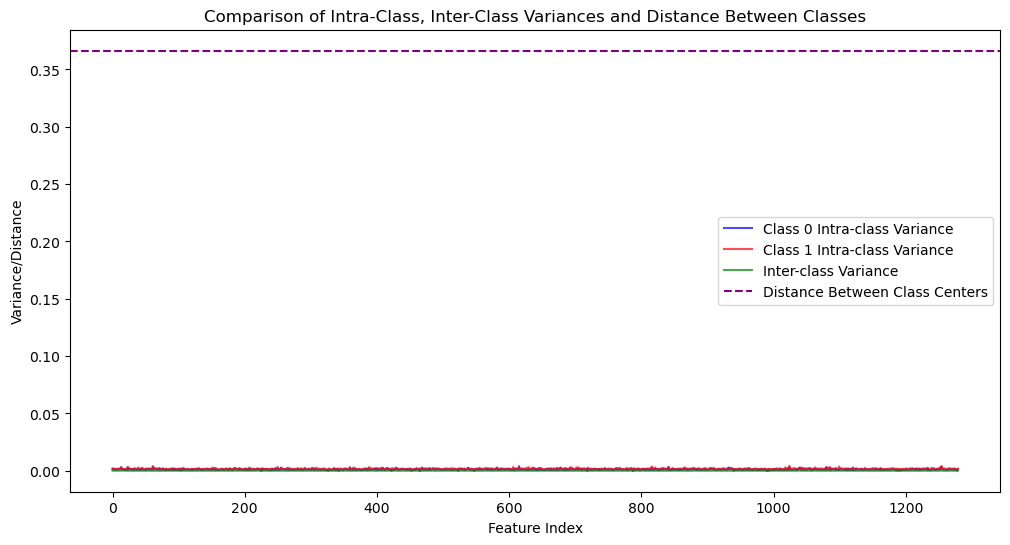

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting all metrics on one plot
plt.figure(figsize=(12, 6))
plt.plot(intra_class_variance_class0, label='Class 0 Intra-class Variance', color='blue', alpha=0.7)
plt.plot(intra_class_variance_class1, label='Class 1 Intra-class Variance', color='red', alpha=0.7)
plt.plot(inter_class_variance, label='Inter-class Variance', color='green', alpha=0.7)

# Adding distance as a horizontal line across the plot
plt.axhline(y=distance_between_class_centers, color='purple', linestyle='--', label='Distance Between Class Centers')

plt.title('Comparison of Intra-Class, Inter-Class Variances and Distance Between Classes')
plt.xlabel('Feature Index')
plt.ylabel('Variance/Distance')
plt.legend()
plt.show()

In [15]:
print(intra_class_variance_class0.max())
print(intra_class_variance_class1.max())
print(inter_class_variance.max())

0.003901410933955084
0.004234538413328596
0.0003433630983313004


In [16]:
max_variance = np.max([intra_class_variance_class0.max(), intra_class_variance_class1.max(), inter_class_variance.max()])
print(max_variance)

0.004234538413328596


# Max_variance is the variance from the intra class variance for class 1
- The value for normalisation in the plot is: 0.004234538413328596
- The normalisation is done only for variance values for better clarity in visualisation.

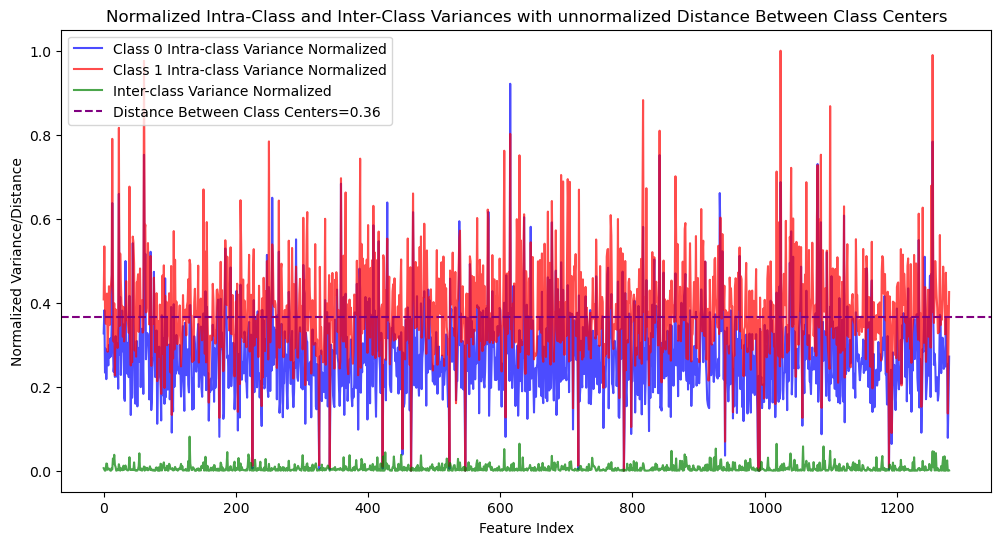

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizing the variances for comparison (optional but often necessary for clarity)
max_variance = np.max([intra_class_variance_class0.max(), intra_class_variance_class1.max(), inter_class_variance.max()])
intra_class_variance_class0_n = intra_class_variance_class0 / max_variance
intra_class_variance_class1_n =intra_class_variance_class1 / max_variance
inter_class_variance_n = inter_class_variance / max_variance

# Plotting all metrics on one plot
plt.figure(figsize=(12, 6))
plt.plot(intra_class_variance_class0_n, label='Class 0 Intra-class Variance Normalized', color='blue', alpha=0.7)
plt.plot(intra_class_variance_class1_n, label='Class 1 Intra-class Variance Normalized', color='red', alpha=0.7)
plt.plot(inter_class_variance_n, label='Inter-class Variance Normalized', color='green', alpha=0.7)

# Adding distance as a horizontal line across the plot
plt.axhline(y=distance_between_class_centers, color='purple', linestyle='--', label=f'Distance Between Class Centers=0.36')

plt.title('Normalized Intra-Class and Inter-Class Variances with unnormalized Distance Between Class Centers')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Variance/Distance')
plt.legend()
plt.show()

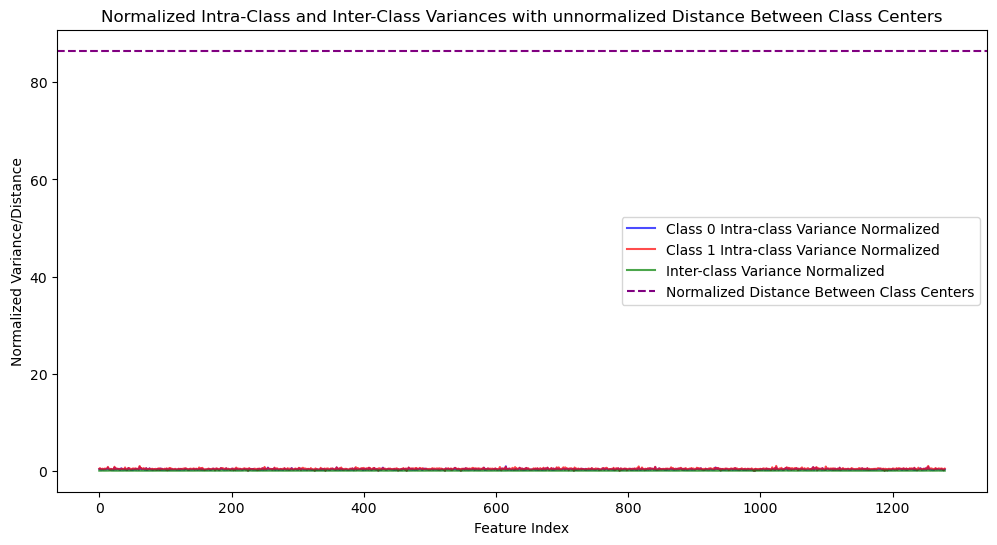

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizing the variances for comparison (optional but often necessary for clarity)
max_variance = 0.004234538413328596
intra_class_variance_class0_n = intra_class_variance_class0 / max_variance
intra_class_variance_class1_n =intra_class_variance_class1 / max_variance
inter_class_variance_n = inter_class_variance / max_variance
distance_between_class_centers_n = distance_between_class_centers/ max_variance

# Plotting all metrics on one plot
plt.figure(figsize=(12, 6))
plt.plot(intra_class_variance_class0_n, label='Class 0 Intra-class Variance Normalized', color='blue', alpha=0.7)
plt.plot(intra_class_variance_class1_n, label='Class 1 Intra-class Variance Normalized', color='red', alpha=0.7)
plt.plot(inter_class_variance_n, label='Inter-class Variance Normalized', color='green', alpha=0.7)

# Adding distance as a horizontal line across the plot
plt.axhline(y=distance_between_class_centers_n, color='purple', linestyle='--', label=f'Normalized Distance Between Class Centers')

plt.title('Normalized Intra-Class and Inter-Class Variances with unnormalized Distance Between Class Centers')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Variance/Distance')
plt.legend()
plt.show()

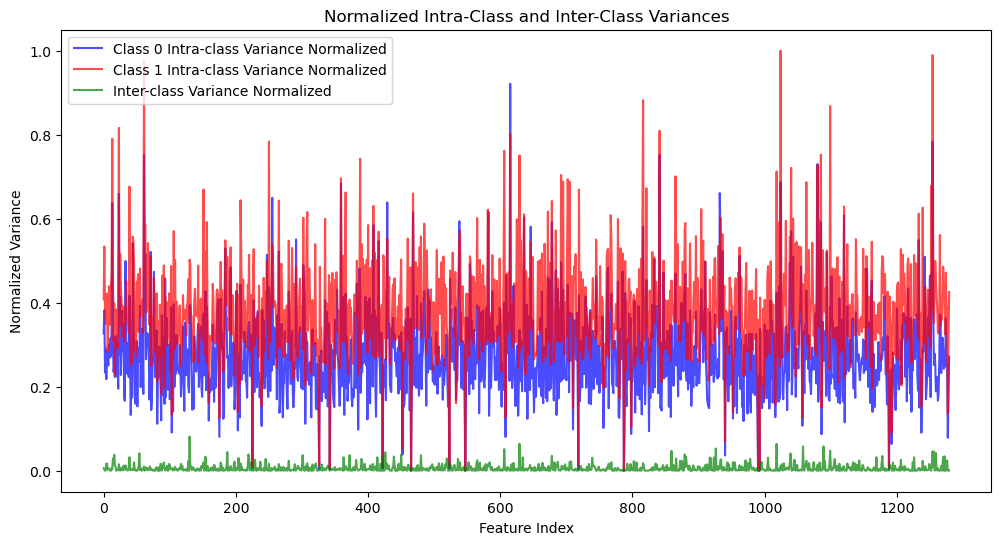

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizing the variances for comparison (optional but often necessary for clarity)
max_variance = 0.004234538413328596
intra_class_variance_class0_n = intra_class_variance_class0 / max_variance
intra_class_variance_class1_n =intra_class_variance_class1 / max_variance
inter_class_variance_n = inter_class_variance / max_variance

# Plotting all metrics on one plot
plt.figure(figsize=(12, 6))
plt.plot(intra_class_variance_class0_n, label='Class 0 Intra-class Variance Normalized', color='blue', alpha=0.7)
plt.plot(intra_class_variance_class1_n, label='Class 1 Intra-class Variance Normalized', color='red', alpha=0.7)
plt.plot(inter_class_variance_n, label='Inter-class Variance Normalized', color='green', alpha=0.7)

plt.title('Normalized Intra-Class and Inter-Class Variances')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Variance')
plt.legend()
plt.show()

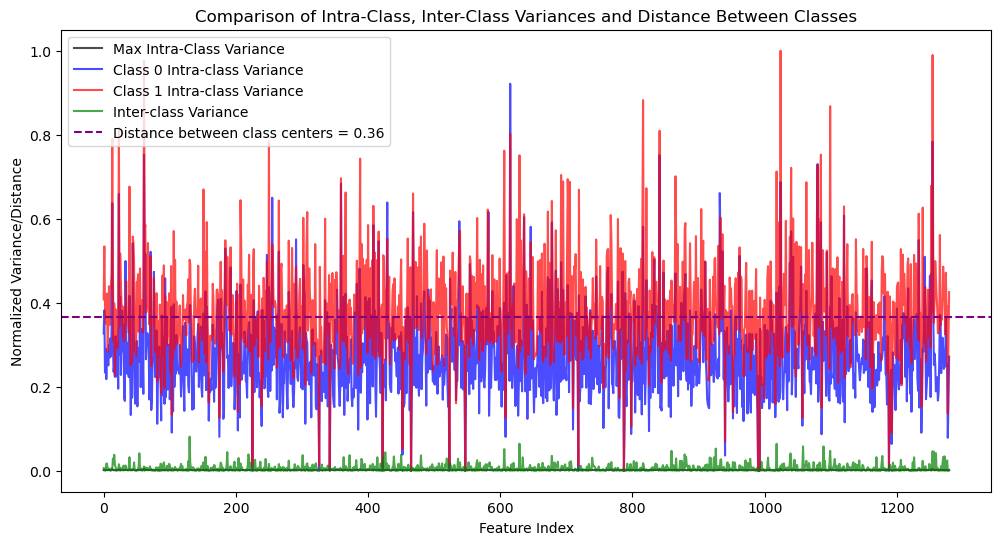

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizing the variances for comparison (optional but often necessary for clarity)
max_variance = np.max([intra_class_variance_class0.max(), intra_class_variance_class1.max(), inter_class_variance.max()])
intra_class_variance_class0 /= max_variance
intra_class_variance_class1 /= max_variance
inter_class_variance /= max_variance
max_intra_class_variance_normalized = max_intra_class_variance/ max_variance

# Plotting all metrics on one plot
plt.figure(figsize=(12, 6))
plt.plot(max_intra_class_variance_normalized, label='Max Intra-Class Variance', color='black', alpha=0.7)
plt.plot(intra_class_variance_class0, label='Class 0 Intra-class Variance', color='blue', alpha=0.7)
plt.plot(intra_class_variance_class1, label='Class 1 Intra-class Variance', color='red', alpha=0.7)
plt.plot(inter_class_variance, label='Inter-class Variance', color='green', alpha=0.7)

# Adding distance as a horizontal line across the plot
plt.axhline(y=distance_between_class_centers, color='purple', linestyle='--', label=f'Distance between class centers = 0.36')

plt.title('Comparison of Intra-Class, Inter-Class Variances and Distance Between Classes')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Variance/Distance')
plt.legend()
plt.show()


# What if we scale the values by maximum distance
- Distance Between Class Centers: 0.36633524619872115

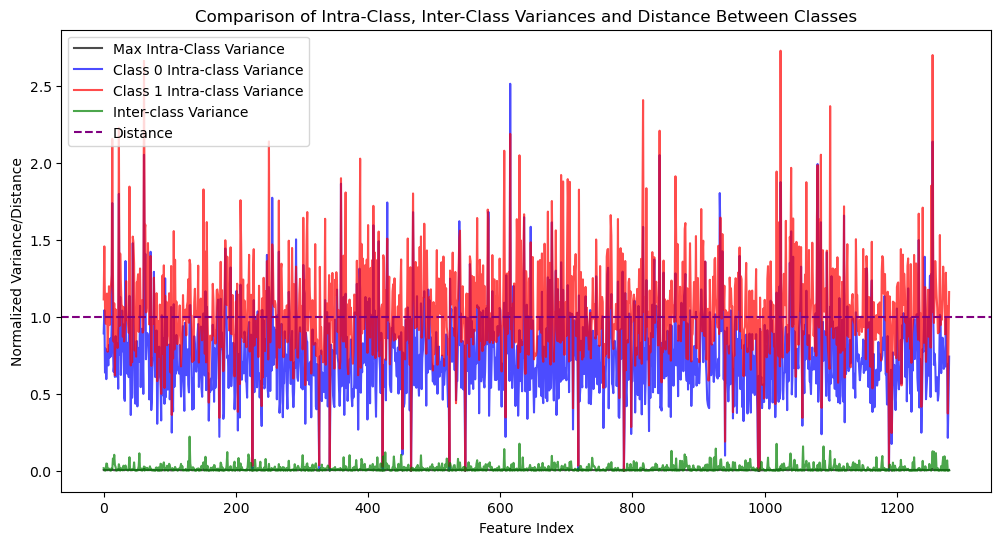

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Normalizing the variances for comparison (optional but often necessary for clarity)
max_distance = 0.36633524619872115
intra_class_variance_class0 /= max_distance
intra_class_variance_class1 /= max_distance
inter_class_variance /= max_distance
max_intra_class_variance_normalized = max_intra_class_variance/ max_distance

distance_between_class_centers_normalized = distance_between_class_centers/max_distance

# Plotting all metrics on one plot
plt.figure(figsize=(12, 6))
plt.plot(max_intra_class_variance_normalized, label='Max Intra-Class Variance', color='black', alpha=0.7)
plt.plot(intra_class_variance_class0, label='Class 0 Intra-class Variance', color='blue', alpha=0.7)
plt.plot(intra_class_variance_class1, label='Class 1 Intra-class Variance', color='red', alpha=0.7)
plt.plot(inter_class_variance, label='Inter-class Variance', color='green', alpha=0.7)

# Adding mean distance as a horizontal line across the plot
plt.axhline(y=distance_between_class_centers_normalized, color='purple', linestyle='--', label=f'Distance')

plt.title('Comparison of Intra-Class, Inter-Class Variances and Distance Between Classes')
plt.xlabel('Feature Index')
plt.ylabel('Normalized Variance/Distance')
plt.legend()
plt.show()